In [12]:
# import relevant modules
from context import extpandas as extpd
import pandas as pd
import numpy as np

In [13]:
# create DataFrame
columns=['feature1', 'feature2', 'feature3', 'feature4']
data=np.array([ [10,20,30,40],
                [11,21,31,41],
                [12,22,32,42],
                [13,23,33,43],
                [14,24,34,44],
                [15,25,35,45],
                [16,26,36,46],
                [17,27,37,47],
                [18,28,38,48],
                [19,29,39,49]])
df=extpd.extDataFrame(data, columns=columns)

print(type(df))
df.head(10)

<class 'extpandas.extdataframe.extDataFrame'>


,feature1,feature2,feature3,feature4
0,10,20,30,40
1,11,21,31,41
2,12,22,32,42
3,13,23,33,43
4,14,24,34,44
5,15,25,35,45
6,16,26,36,46
7,17,27,37,47
8,18,28,38,48
9,19,29,39,49


In [14]:
ex_order=[0, 0, 0, 0]
ex_delay=[0, 0, 0, -1]
auto_order=1
pred_step=5
df.NARX(ex_order, ex_delay, auto_order, pred_step, inplace=True)
df

,feature1_d0_o0,feature2_d0_o0,feature3_d0_o0,feature4_d-1_o0
0,10.0,20.0,30.0,41.0
1,11.0,21.0,31.0,42.0
2,12.0,22.0,32.0,43.0
3,13.0,23.0,33.0,44.0
4,14.0,24.0,34.0,45.0
5,15.0,25.0,35.0,46.0
6,16.0,26.0,36.0,47.0
7,17.0,27.0,37.0,48.0
8,18.0,28.0,38.0,49.0


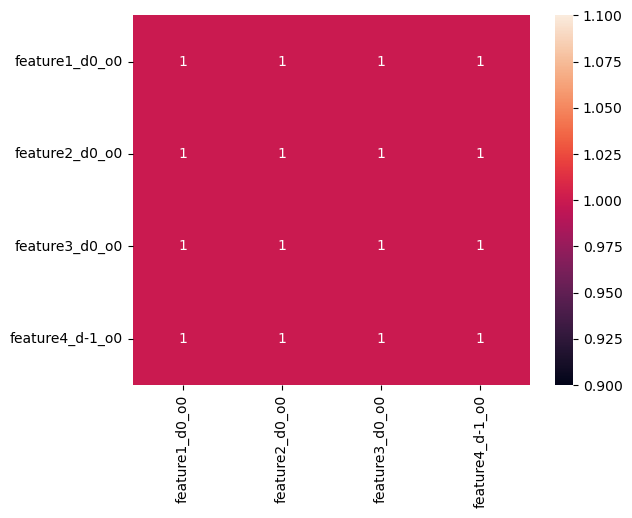

,feature1_d0_o0,feature2_d0_o0,feature3_d0_o0,feature4_d-1_o0
feature1_d0_o0,1.0,1.0,1.0,1.0
feature2_d0_o0,1.0,1.0,1.0,1.0
feature3_d0_o0,1.0,1.0,1.0,1.0
feature4_d-1_o0,1.0,1.0,1.0,1.0


In [15]:
# test getCorrelation
df.getCorrMatrix()

In [16]:
# test transform
df.Transform(transformation='MinMaxScaler', feature_range=(0,1))

print('Dataframe of type ', type(df)) 
df.head(10)

Dataframe of type  <class 'extpandas.extdataframe.extDataFrame'>


,feature1_d0_o0,feature2_d0_o0,feature3_d0_o0,feature4_d-1_o0
0,0.000,0.000,0.000,0.000
1,0.125,0.125,0.125,0.125
2,0.250,0.250,0.250,0.250
3,0.375,0.375,0.375,0.375
4,0.500,0.500,0.500,0.500
5,0.625,0.625,0.625,0.625
6,0.750,0.750,0.750,0.750
7,0.875,0.875,0.875,0.875
8,1.000,1.000,1.000,1.000


In [17]:
# test inverse
df.InverseTransform()

print('Dataframe of type ', type(df)) 
df.head(10)

Dataframe of type  <class 'extpandas.extdataframe.extDataFrame'>


,feature1_d0_o0,feature2_d0_o0,feature3_d0_o0,feature4_d-1_o0
0,10.0,20.0,30.0,41.0
1,11.0,21.0,31.0,42.0
2,12.0,22.0,32.0,43.0
3,13.0,23.0,33.0,44.0
4,14.0,24.0,34.0,45.0
5,15.0,25.0,35.0,46.0
6,16.0,26.0,36.0,47.0
7,17.0,27.0,37.0,48.0
8,18.0,28.0,38.0,49.0


In [18]:
# test ViewAsWindows
df_windows=df.ViewAsWindows(window_length=5)

print('Shape:               ', df_windows.shape)
print('First slice:         \n', df_windows[0, :, :])
print('Last slice:          \n', df_windows[-1, :, :])

Shape:                (5, 5, 4)
First slice:         
 [[10. 20. 30. 41.]
 [11. 21. 31. 42.]
 [12. 22. 32. 43.]
 [13. 23. 33. 44.]
 [14. 24. 34. 45.]]
Last slice:          
 [[14. 24. 34. 45.]
 [15. 25. 35. 46.]
 [16. 26. 36. 47.]
 [17. 27. 37. 48.]
 [18. 28. 38. 49.]]


In [19]:
#test splitTrainTest
# split dataset in train and test
train_df, test_df = df.splitTrainTest(test_size=0.2, shuffle=True)

print('Train Dataset of type ', type(train_df)) 
train_df.head()
#print('Test Dataset')
#test_df.head()


Train Dataset of type  <class 'extpandas.extdataframe.extDataFrame'>


,feature1_d0_o0,feature2_d0_o0,feature3_d0_o0,feature4_d-1_o0
2,12.0,22.0,32.0,43.0
6,16.0,26.0,36.0,47.0
8,18.0,28.0,38.0,49.0
7,17.0,27.0,37.0,48.0
5,15.0,25.0,35.0,46.0


In [20]:
# test splitXY
X_features=['feature1', 'feature2', 'feature3']
Y_features=['feature4']
X_train, Y_train=train_df.splitXY(X_features, Y_features)

print('X dataset')
X_train.head()

X dataset


AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
# test quantiles
np.random.seed(33454)
# df = (
#     # A standard distribution
#     extpd.extDataFrame({'nb': np.random.randint(0, 100, 100)})
#         # Adding some outliers
#         .append(extpd.extDataFrame({'nb': np.random.randint(100, 200, 6)}))
#         # Reseting the index
#         .reset_index(drop=True)
#     )

df = (
    # A standard distribution
    extpd.extDataFrame({'nb': np.random.normal(0, 0.1, 200)})
        # Adding some outliers
        .append(extpd.extDataFrame({'nb': np.random.randint(5, 10, 2)}))
        # Reseting the index
        .reset_index(drop=True)
    )

fig=df.plotDistribution(100)
fig.show()
df.removeOutliers(method='IQR')
fig=df.plotDistribution(100)
fig.show()